In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Loading Data

In [6]:
# movies = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/movies.csv')
# data = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/data.csv')

movies = pd.read_csv('data/movies.csv')
data = pd.read_csv('data/data.csv')

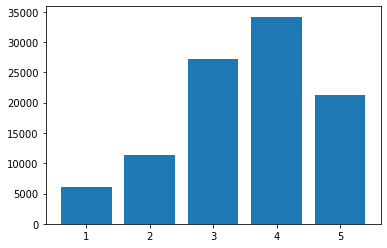

In [37]:
ratings = data['Rating']
labels = list(range(1, 6, 1))
freq = [ratings[ratings == i].count() for i in labels]
plt.bar(labels, freq)
# plt.xticks(np.arange(1, 6, 1))
plt.show()

#TODO: Add axis and plot titles

[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]
{'English Patient, The (1996)', 'Air Force One (1997)', 'Return of the Jedi (1983)', 'Star Wars (1977)', 'Toy Story (1995)', 'Liar Liar (1997)', 'Fargo (1996)', 'Contact (1997)', 'Independence Day (ID4) (1996)', 'Scream (1996)'}


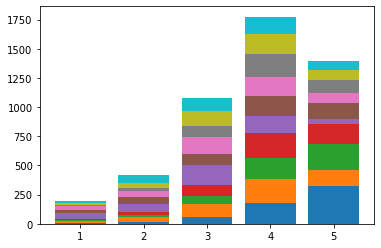

In [100]:
top_ten = data.value_counts(subset=['Movie ID'])[:10]

ids = []
for element in list(top_ten.keys()):
    ids.append(element[0])
print(ids)

i = 0
titles = set()
for movie in range(len(movies)):
    if movies['Movie ID'][movie] in ids:
        titles.add(movies['Movie Title'][movie])
# rating = [movies[movies['Movie Title'] == mov_id] for mov_id in ids]

print(titles)
bottom = [0, 0, 0, 0, 0]
prev_bottom = []

for j in range(0, 10):
    labels = list(range(1, 6, 1))
    freq = [0, 0, 0, 0, 0]
    prev_bottom = bottom.copy()
    for i in range(len(data)):
        if data['Movie ID'][i] == (ids[j]):
            freq[data['Rating'][i]-1] += 1
            bottom[data['Rating'][i]-1] += 1
    plt.bar(labels, freq, bottom=prev_bottom)
plt.show()
    #TODO: Add axis titles and plt title

In [87]:
freq = [ratings[ratings == i] for i in labels]
print(freq)

[2        1
4        1
36       1
38       1
61       1
        ..
99926    1
99965    1
99970    1
99982    1
99997    1
Name: Rating, Length: 6110, dtype: int64, 3        2
6        2
10       2
17       2
19       2
        ..
99979    2
99984    2
99987    2
99993    2
99998    2
Name: Rating, Length: 11370, dtype: int64, 0        3
1        3
8        3
9        3
13       3
        ..
99986    3
99992    3
99994    3
99995    3
99999    3
Name: Rating, Length: 27145, dtype: int64, 5        4
18       4
20       4
21       4
22       4
        ..
99985    4
99988    4
99989    4
99990    4
99991    4
Name: Rating, Length: 34174, dtype: int64, 7        5
11       5
12       5
16       5
26       5
        ..
99961    5
99962    5
99963    5
99978    5
99996    5
Name: Rating, Length: 21201, dtype: int64]
